Import the needed libraries, can rename libraries for the sake of ease using the "as" keyword

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pylab

generate some data to play around with, I'm cheating a bit and am just drawing from a exponential distribution

(array([0.13897273, 0.07489549, 0.03744774, 0.0119278 , 0.00915389,
        0.00221913, 0.00110956, 0.00055478, 0.00055478, 0.00055478]),
 array([1.07020453e-03, 3.60609388e+00, 7.21111756e+00, 1.08161412e+01,
        1.44211649e+01, 1.80261886e+01, 2.16312123e+01, 2.52362359e+01,
        2.88412596e+01, 3.24462833e+01, 3.60513070e+01]),
 <BarContainer object of 10 artists>)

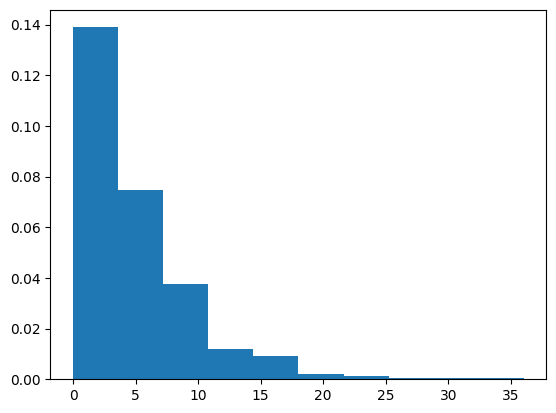

In [ ]:
# Generate random data for the histogram
interarrival_Data = np.random.exponential(5, size=1000)
plt.hist(interarrival_Data,density=True) #density simply normalizes the data s.t the sum of the data is 1

start by estimating possible distributions. clearly this is a exponential distribution, but just for fun let's throw in normal and gamma. Next we will use python's built in libraries to estimate the parameters of these distributions

In [ ]:
rX = np.linspace(0,50, 1000) #create a list that contains 1000 even partitions between 0-50

#-------exponetial distribution fitting----------------
P_expon = ss.expon.fit(interarrival_Data) #parameters for exponential distribution
rE = ss.expon.pdf(rX, *P_expon)
print("Parameters for the expontial distribution are", P_expon)
#-------normal distribution fitting----------------
P_norm = ss.norm.fit(interarrival_Data)
rN = ss.norm.pdf(rX, *P_norm)
print("Parameters for the normal distribution are", P_norm)
#-------gamma distribution fitting----------------
P_gamma = ss.gamma.fit(interarrival_Data)
rG = ss.gamma.pdf(rX, *P_gamma)
print("Parameters for the gamma distribution are", P_gamma)


Parameters for the expontial distribution are (0.0010702045333612733, 4.877120060125606)
Parameters for the normal distribution are (4.878190264658968, 4.709364716400077)
Parameters for the gamma distribution are (1.0173818353244064, 0.0009754658185489751, 4.793862186351756)


lets see how well each distribution fits

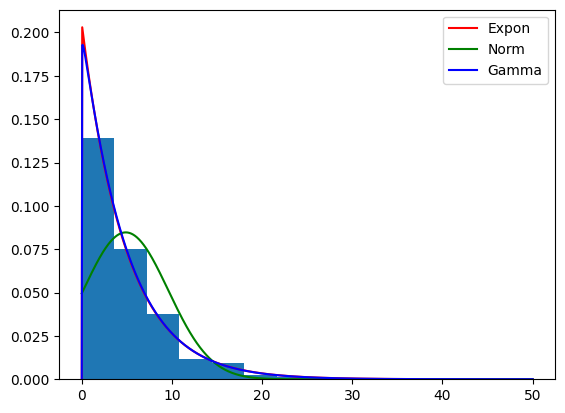

In [ ]:
plt.hist(interarrival_Data,density=True)
plt.plot(rX, rE,color = 'r')
plt.plot(rX, rN,color = 'g')
plt.plot(rX, rG,color = 'b')

plt.legend(["Expon","Norm","Gamma"])
plt.show()

obviously exponential fits really well and normal doesn't at all. Surprisingly, gamma fits really well! Now how do we determine which distribution to use? we will use quality of fit tests!

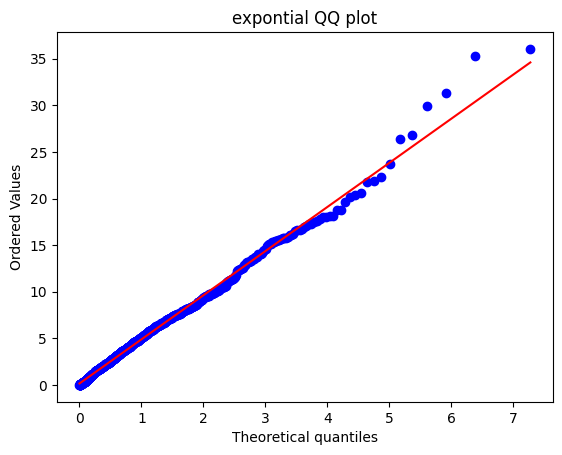

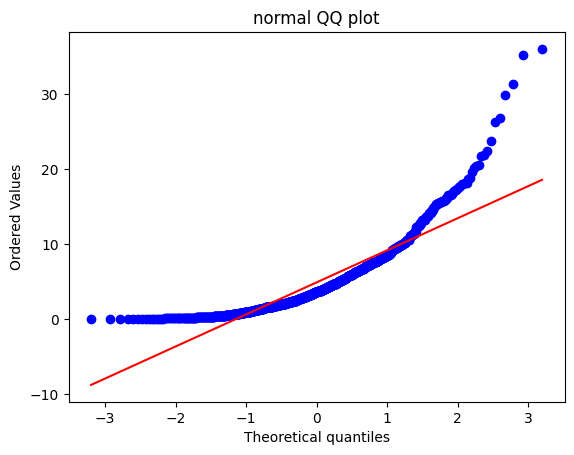

In [ ]:
#starting with QQ plots
ss.probplot(interarrival_Data, dist="expon", plot=pylab)
plt.title('expontial QQ plot')
plt.show()
ss.probplot(interarrival_Data, dist="norm", plot=pylab)
plt.title('normal QQ plot')
plt.show()

next lets look at the KS test

In [ ]:
print("KS test for expon")
print(ss.kstest(interarrival_Data, 'expon', args=P_expon))
print("KS test for norm")
print(ss.kstest(interarrival_Data, 'norm', args=P_norm))
print("KS test for gamma")
print(ss.kstest(interarrival_Data, 'gamma', args=P_gamma))

KS test for expon
KstestResult(statistic=0.03473289800495841, pvalue=0.1749003430266779, statistic_location=1.514173526351161, statistic_sign=-1)
KS test for norm
KstestResult(statistic=0.15018934370018006, pvalue=3.712092171163504e-20, statistic_location=0.0010702045333612733, statistic_sign=-1)
KS test for gamma
KstestResult(statistic=0.03098435114042178, pvalue=0.2863591490338049, statistic_location=1.514173526351161, statistic_sign=-1)


In [ ]:
import random
random.seed(1)
print(random.random())

0.13436424411240122
